<a href="https://colab.research.google.com/github/pri538/Deep-Learning-Project/blob/main/Milk_Prediction_For_Next_Year.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Activation,Dense,Dropout
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/monthly-milk-production.csv',index_col='Month')
df.index = pd.to_datetime(df.index)
df

,Milk Production
Month,
1962-01-01 01:00:00,589.0
1962-02-01 01:00:00,561.0
1962-03-01 01:00:00,640.0
1962-04-01 01:00:00,656.0
1962-05-01 01:00:00,727.0
...,...
1975-08-01 01:00:00,858.0
1975-09-01 01:00:00,817.0
1975-10-01 01:00:00,827.0


<Axes: xlabel='Month'>

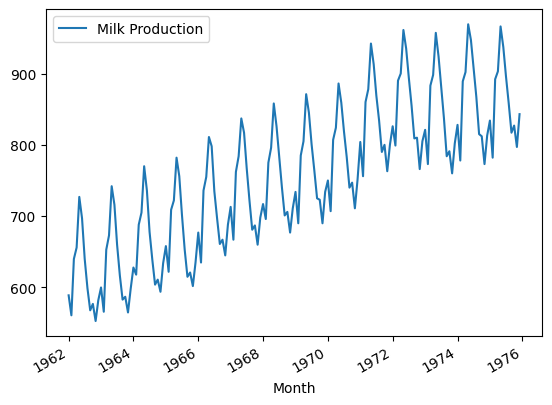

In [ ]:
df.plot()

In [ ]:
scaler = MinMaxScaler()

array = []
train_data = []
train_labels = []

for i in range(len(df)):
    array.append(df.iloc[i]['Milk Production'])

array = np.array(array).reshape(-1,1)
array = scaler.fit_transform(array)
array

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231],
       [0.        ],
       [0.06971154],
       [0.11298077],
       [0.03125   ],
       [0.24038462],
       [0.28846154],
       [0.45432692],
       [0.39182692],
       [0.25721154],
       [0.15384615],
       [0.07211538],
       [0.08173077],
       [0.02884615],
       [0.10817308],
       [0.18028846],
       [0.15625   ],
       [0.32451923],
       [0.36538462],
       [0.52163462],
       [0.43990385],
       [0.30048077],
       [0.20673077],
       [0.12259615],
       [0.13942308],
       [0.09855769],
       [0.19471154],
       [0.25240385],
       [0.16586538],
       [0.375     ],
       [0.40625   ],
       [0.55048077],
       [0.48798077],
       [0.35817308],
       [0.24038462],
       [0.14903846],
       [0.16346154],
       [0.11778846],
       [0.197

In [ ]:
k = 0
for i in range(len(array)):
    try:
        train_data.append(array[12*k:12*(k+1)])
        train_labels.append(array[12*(k+1)])
        k+=1
    except:
        break

In [ ]:
train_data = np.squeeze(train_data)
train_data.shape

(14, 12)

In [ ]:
train_labels = np.array(train_labels)
train_labels.shape

(13, 1)

In [ ]:
train_data = train_data[:len(train_labels)]
train_data = np.expand_dims(train_data,1)
train_data.shape

(13, 1, 12)

In [ ]:
train_data[1]

array([[0.11298077, 0.03125   , 0.24038462, 0.28846154, 0.45432692,
        0.39182692, 0.25721154, 0.15384615, 0.07211538, 0.08173077,
        0.02884615, 0.10817308]])

In [ ]:
train_labels[1]

array([0.18028846])

In [ ]:
model = Sequential()

model.add(LSTM(250,input_shape=(1,12)))
model.add(Dropout(0.5))


model.add(Dense(250,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(12,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='relu'))

model.compile(loss='mean_squared_error',optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 250)               263000    
                                                                 
 dropout (Dropout)           (None, 250)               0         
                                                                 
 dense (Dense)               (None, 250)               62750     
                                                                 
 dropout_1 (Dropout)         (None, 250)               0         
                                                                 
 dense_1 (Dense)             (None, 12)                3012      
                                                                 
 dropout_2 (Dropout)         (None, 12)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
E = 1000

H = model.fit(train_data,train_labels,epochs=E)

Epoch 1/1000
1/1 [==============================] - 4s 4s/step - loss: 0.2305
Epoch 2/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.2290
Epoch 3/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.2256
Epoch 4/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.2078
Epoch 5/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.2016
Epoch 6/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.1800
Epoch 7/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.1660
Epoch 8/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.1457
Epoch 9/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.1235
Epoch 10/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.0980
Epoch 11/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0801
Epoch 12/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.1071
Epoch 13/1000
1/1 [====================

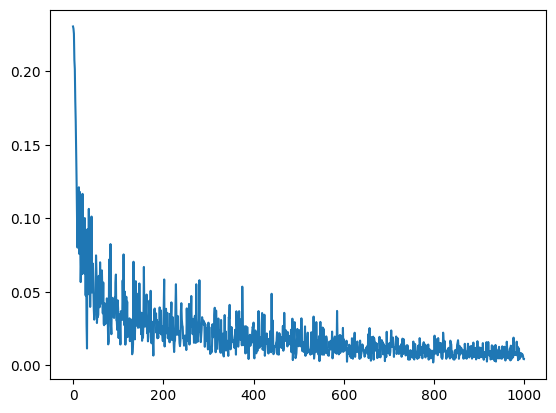

In [ ]:
epochs = range(0,E)
loss = H.history['loss']
plt.plot(epochs,loss)

1/1 [==============================] - 1s 739ms/step


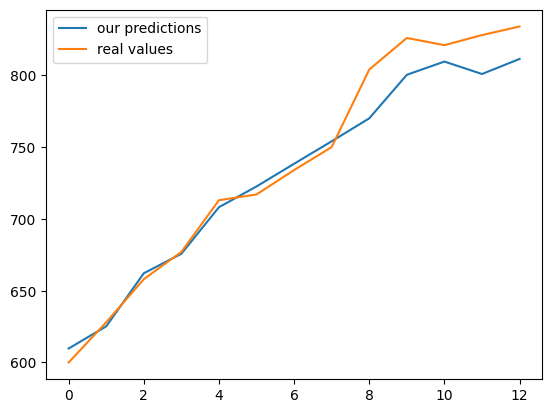

In [ ]:
preds = scaler.inverse_transform(model.predict(train_data))
plt.plot(range(0,13),preds,label='our predictions')
plt.plot(range(0,13),scaler.inverse_transform(train_labels),label='real values')
plt.legend()

In [ ]:
seed = array[-12:]
seed

array([[0.67548077],
       [0.55048077],
       [0.81490385],
       [0.84134615],
       [0.99278846],
       [0.92307692],
       [0.82451923],
       [0.73317308],
       [0.63461538],
       [0.65865385],
       [0.58653846],
       [0.69711538]])

In [ ]:
seed.shape

(12, 1)

In [ ]:
for _ in range(12):
    curr_12_months = seed[-12:]
    curr_12_months = np.squeeze(curr_12_months)
    curr_12_months = np.expand_dims(curr_12_months,0)
    curr_12_months = np.expand_dims(curr_12_months,0)
    pred = model.predict(curr_12_months)
    seed = np.append(seed,pred)

1/1 [==============================] - 0s 47ms/step


In [ ]:
seed

array([0.67548077, 0.55048077, 0.81490385, 0.84134615, 0.99278846,
       0.92307692, 0.82451923, 0.73317308, 0.63461538, 0.65865385,
       0.58653846, 0.69711538, 0.63847744, 0.64147854, 0.6678108 ,
       0.68524736, 0.69650853, 0.69239873, 0.67906046, 0.67330647,
       0.66645932, 0.66310799, 0.6593737 , 0.65959066])

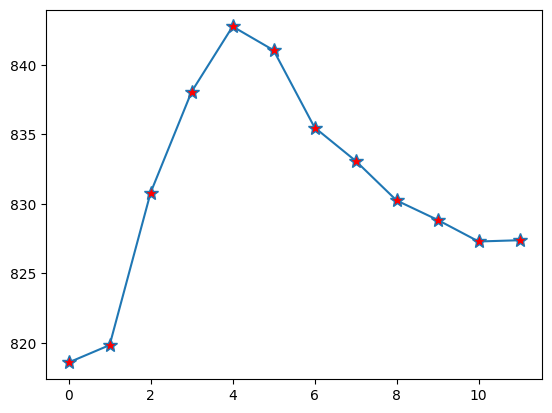

In [ ]:
next_year_prediction = scaler.inverse_transform(seed[-12:].reshape(-1,1))
plt.plot(range(0,12),next_year_prediction,marker='*',markerfacecolor='red',markersize=10)